In [3]:
import pandas as pd

df = pd.read_csv('data/video_browsing_history_full_tiktok_data.csv')
# drop duplicates - rows that have the same date and link
# but keep the rest of the columns

unique_date_and_link = df.drop_duplicates(subset=['Date', 'Link'])

unique_date_and_link.to_csv('data/unique_video_browsing_history_full_tiktok_data.csv', index=False)

In [19]:
import pandas as pd

history = pd.read_csv('data/unique_video_browsing_history_full_tiktok_data.csv')
likes = pd.read_csv('data/likes_full_tiktok_data.csv')
favorites = pd.read_csv('data/favorite_videos_full_tiktok_data.csv')
share = pd.read_csv('data/share_history_full_tiktok_data.csv')

In [26]:
# Remove nan values
import numpy as np
history['Hashtags'].replace(['None', 'nan', 'N/A'], np.nan, inplace=True)
history_hashtags = history[history['Hashtags'].notna()]['Hashtags']
history_hashtags
history_hashtags_list = history_hashtags.values.tolist()
# Initialize an empty list to store the individual hashtags
individual_hashtags = []
hashtags_duplicates = []

# Iterate through the list and split each string into individual hashtags
for string in history_hashtags_list:
    hashtags = []
    for tag in string.split(','):
        tag = tag.lower()
        tag = tag.strip()
        hashtags.append(tag)

    individual_hashtags.extend(hashtags)
    hashtags_duplicates.extend(hashtags)

print(len(individual_hashtags))

# Remove duplicates
individual_hashtags = list(set(individual_hashtags))
print(len(individual_hashtags))

# Remove empty strings
individual_hashtags = list(filter(None, individual_hashtags))
hashtags_duplicates = list(filter(None, hashtags_duplicates))
print(len(individual_hashtags))

697770
80006
80005


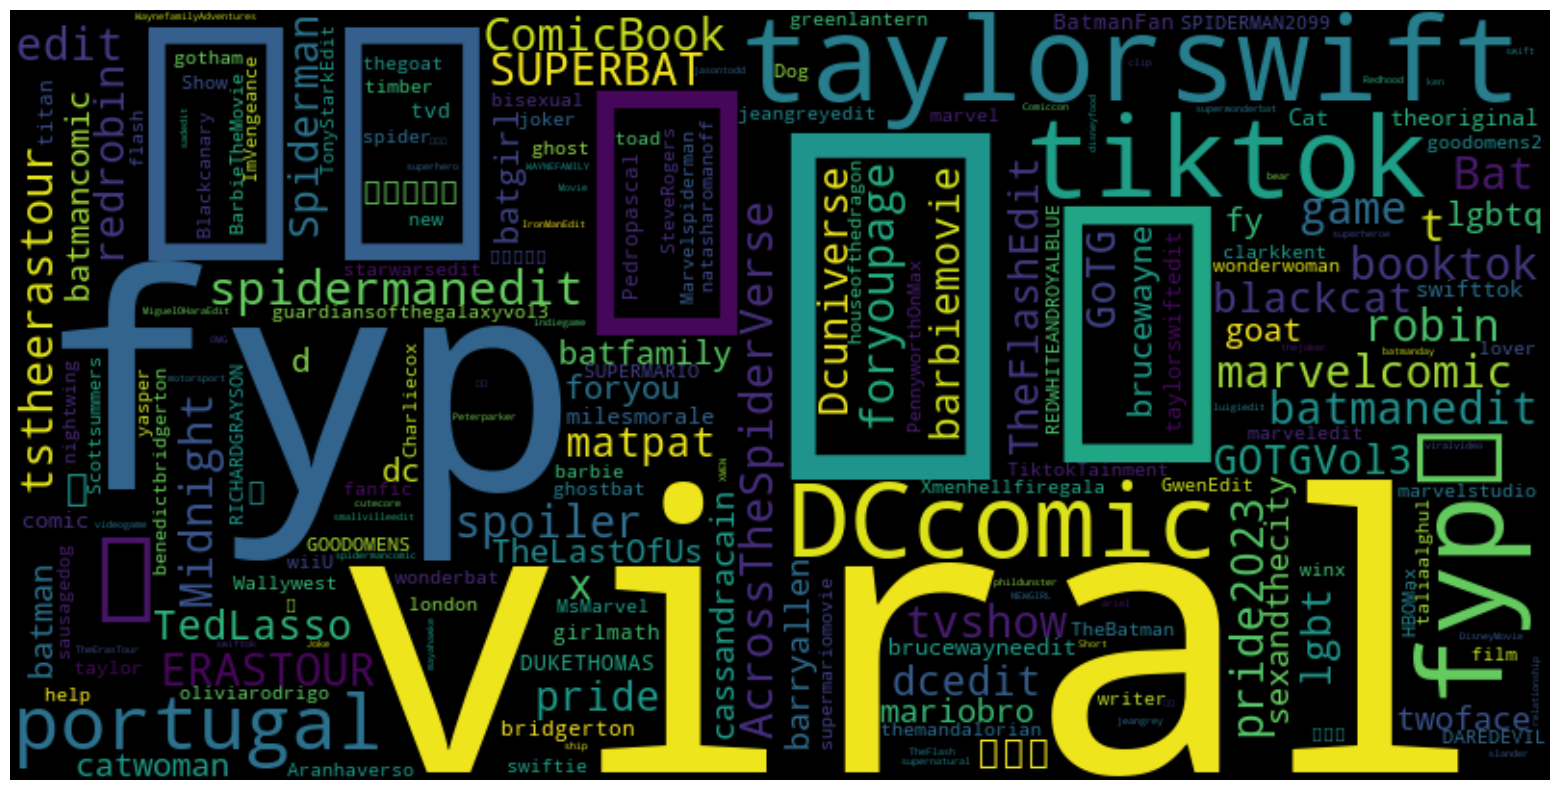

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the values in the "Hashtags" column to strings

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False).generate(' '.join(individual_hashtags))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # To remove the axis
plt.show()

We have some hashtags which are effects like CapCut, greenscreen, aftereffect
Similar stuff that we should remove #fyp, #fypシ, #fy, #foryou, #fypage, #foryoupage (Basically eliminate everything that starts with fy and foryou) -> done
Remove nan (done)
Maybe remove #viral?
Test gensim

In [33]:
import re
# Define a regular expression pattern to match hashtags starting with "#fy" or "#fory"
pattern = r'#(fy\w+|fory\w+|fy|xyzbca|viral)'

# Use a list comprehension to filter out strings that match the pattern
filtered_text_list = [text for text in individual_hashtags if not re.search(pattern, text)]
hashtags_duplicates = [text for text in hashtags_duplicates if not re.search(pattern, text)]

len(filtered_text_list)

79717

In [34]:
# Get number of occurrences of each hashtag
from collections import Counter

hashtags_count = Counter(hashtags_duplicates)
print(hashtags_count)
# put it in a dataframe
hashtags_duplicate_df = pd.DataFrame.from_dict(hashtags_count, orient='index').reset_index()
hashtags_duplicate_df.columns = ['Hashtag', 'Count']
hashtags_duplicate_df.sort_values(by=['Count'], ascending=False, inplace=True)
hashtags_duplicate_df.head(10)


Counter({'#taylorswift': 9270, '#viral': 7793, '#edit': 7657, '#batman': 6735, '#dc': 5487, '#dccomics': 5413, '#marvel': 4691, '#brucewayne': 4413, '#swifttok': 3483, '#erastour': 3314, '#spiderman': 3261, '#swiftie': 2833, '#xyzbca': 2624, '#tvd': 2179, '#greenscreen': 2097, '#starwars': 2088, '#barbie': 2021, '#trending': 1939, '#superman': 1857, '#capcut': 1856, '#taylorsversion': 1825, '#batmanedit': 1816, '#tedlasso': 1804, '#mcu': 1798, '#thevampirediaries': 1670, '#theerastour': 1661, '#pedropascal': 1654, '#peterparker': 1630, '#klausmikaelson': 1512, '#robin': 1496, '#tvdu': 1396, '#taylornation': 1386, '#comics': 1379, '#aftereffects': 1369, '#dcuniverse': 1360, '#stefansalvatore': 1309, '#brucewayneedit': 1268, '#nightwing': 1262, '#batfamily': 1260, '#dcedit': 1243, '#xmen': 1191, '#jasontodd': 1180, '#clarkkent': 1158, '#theoriginals': 1156, '#marvelcomics': 1151, '#comictok': 1111, '#milesmorales': 1066, '#barbiemovie': 1064, '#acrossthespiderverse': 1052, '#booktok': 10

,Hashtag,Count
7,#taylorswift,9270
91,#viral,7793
44,#edit,7657
156,#batman,6735
698,#dc,5487
157,#dccomics,5413
56,#marvel,4691
351,#brucewayne,4413
302,#swifttok,3483
154,#erastour,3314


In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_word = stemmer.stem("booktok")
stemmed_word

'booktok'

In [17]:
filtered_text_list

['#jaredleto',
 '#message',
 '#hingefunny',
 '#starmoraedit',
 '#freeguymovie',
 '#glamour',
 '#marooncceditcomp',
 '#haileydunphy',
 '#learningspanishlanguage',
 '#nintendoswitcheshop',
 '#3dseshop',
 '#princessannikaedit',
 '#tuga',
 '#nyusekai',
 '#sarahhyland',
 '#setitoffband',
 '#spidermancosplay',
 '#disneyanimation',
 '#spiritualquotes',
 '#countrysideliving',
 '#PuedesSerLoQueQuieras',
 '#heatingpad',
 '#roomroutine',
 '#petshopunboxing',
 '#dermatitistreatment',
 '#tuwomt',
 '#animegirl',
 '#bars',
 '#ingles',
 '#tweets',
 '#tvshowscene',
 '#afcrichmondedit',
 '#cameo',
 '#Batfamilia',
 '#legosuperman',
 '#missingsubmersible',
 '#SMHC',
 '#jessandnickedit',
 '#retailworker',
 '#taylorswiftpin',
 '#x23',
 '#barbielooks',
 '#battleofthesupersonsedit',
 '#christianbale',
 '#xokittyseries',
 '#cashmereandgloss',
 '#garbs4gamers',
 '#robbiewilliams',
 '#thebatman',
 '#epicrapbattlesofhistory',
 '#airplanes',
 '#dragonballheroes',
 '#romangerriedit',
 '#childfreetiktok',
 '#coolani

In [25]:
from gensim.models import Word2Vec

hashtags = filtered_text_list[:150]
# Tokenize the hashtags (you may need to preprocess and tokenize these properly)
tokenized_hashtags = [hashtag.split() for hashtag in hashtags]
tokenized_hashtags

# Train a Word2Vec model on the tokenized hashtags
# model = Word2Vec(tokenized_hashtags, vector_size=100, window=5, min_count=1, sg=0)
# 
# # Find similar hashtags for a specific hashtag
# similar_hashtags = model.wv.most_similar('#erastour')
# print(similar_hashtags)

[['#jaredleto'],
 ['#message'],
 ['#hingefunny'],
 ['#starmoraedit'],
 ['#freeguymovie'],
 ['#glamour'],
 ['#marooncceditcomp'],
 ['#haileydunphy'],
 ['#learningspanishlanguage'],
 ['#nintendoswitcheshop'],
 ['#3dseshop'],
 ['#princessannikaedit'],
 ['#tuga'],
 ['#nyusekai'],
 ['#sarahhyland'],
 ['#setitoffband'],
 ['#spidermancosplay'],
 ['#disneyanimation'],
 ['#spiritualquotes'],
 ['#countrysideliving'],
 ['#PuedesSerLoQueQuieras'],
 ['#heatingpad'],
 ['#roomroutine'],
 ['#petshopunboxing'],
 ['#dermatitistreatment'],
 ['#tuwomt'],
 ['#animegirl'],
 ['#bars'],
 ['#ingles'],
 ['#tweets'],
 ['#tvshowscene'],
 ['#afcrichmondedit'],
 ['#cameo'],
 ['#Batfamilia'],
 ['#legosuperman'],
 ['#missingsubmersible'],
 ['#SMHC'],
 ['#jessandnickedit'],
 ['#retailworker'],
 ['#taylorswiftpin'],
 ['#x23'],
 ['#barbielooks'],
 ['#battleofthesupersonsedit'],
 ['#christianbale'],
 ['#xokittyseries'],
 ['#cashmereandgloss'],
 ['#garbs4gamers'],
 ['#robbiewilliams'],
 ['#thebatman'],
 ['#epicrapbattleso

In [31]:
# see the most popular hashtags and plot them
history["Hashtags"].value_counts()

wip_plot = history["Hashtags"].dropna()
wip_plot = wip_plot.str.split(',')
wip_plot = wip_plot.explode()
wip_plot = wip_plot.str.strip()

wip_plot = wip_plot.value_counts()

# put the hashtags in a dataframe
wip_plot = pd.DataFrame(wip_plot)
wip_plot.reset_index(inplace=True)
wip_plot.columns = ['Hashtags', 'Count']

0               #fandom
0               #fanfic
0           #fanfiction
0        #fandomhistory
0            #slashfans
              ...      
88347           #office
88347    #officefashion
88347         #fitcheck
88347          #fitness
88347              #gym
Name: Hashtags, Length: 697770, dtype: object

In [4]:
import wordninja

filtered_hashtags_test = filtered_text_list[:1000]
filtered_sep_test = []
for i in filtered_hashtags_test:
    ninja = wordninja.split(i)
    word = ' '.join(ninja)
    print(word)
    filtered_sep_test.append(word)

filtered_sep_test

cvs paper less challenge
beverly hills chihuahua 2
vinny
cap aest u dante
jelly reacts
miguel ohara spiderman
nick fink
777
daphne s diary
king francis
surf
cat must have s
vault track
seb stan
di cases tudo s
i wanna ride
childrens hospital of pittsburgh
walk tok
open everyday
w th
aminah stv
damian wayne edits
thought unspoken
this ls the way
regular show meme
in era
gamers
that gur lo o
jade nguyen
natural makeup look
welcome to story brooke
loz tp
pop music
home maranh a 3
tyler doohan
de ppv heard netflix
new york intern
bruce lee
auto cui dado
six wives of henry viii
calc u lode medic a men to
passionfruit
valeri y and vasil is a
ratio
dystopian books
slow cooker
bi lion aires
click er
mayonnaise gate
dunks
high heels shoes
none sense
judi dench
bulldog
port of in o
pc gamer
super buddies
begging
fo oriana
stewie griffin edits
diy haircut
afc richmond
submarine titanic
robin grayson
pink fit
expert marriage tip
canada tik tok
lovecraft
d cvs vampiro s
young adult books
stylist
fa

['cvs paper less challenge',
 'beverly hills chihuahua 2',
 'vinny',
 'cap aest u dante',
 'jelly reacts',
 'miguel ohara spiderman',
 'nick fink',
 '777',
 'daphne s diary',
 'king francis',
 'surf',
 'cat must have s',
 'vault track',
 'seb stan',
 'di cases tudo s',
 'i wanna ride',
 'childrens hospital of pittsburgh',
 'walk tok',
 'open everyday',
 'w th',
 'aminah stv',
 'damian wayne edits',
 'thought unspoken',
 'this ls the way',
 'regular show meme',
 'in era',
 'gamers',
 'that gur lo o',
 'jade nguyen',
 'natural makeup look',
 'welcome to story brooke',
 'loz tp',
 'pop music',
 'home maranh a 3',
 'tyler doohan',
 'de ppv heard netflix',
 'new york intern',
 'bruce lee',
 'auto cui dado',
 'six wives of henry viii',
 'calc u lode medic a men to',
 'passionfruit',
 'valeri y and vasil is a',
 'ratio',
 'dystopian books',
 'slow cooker',
 'bi lion aires',
 'click er',
 'mayonnaise gate',
 'dunks',
 'high heels shoes',
 'none sense',
 'judi dench',
 'bulldog',
 'port of in o

In [5]:
filtered_hashtags_test_pd = pd.DataFrame(filtered_hashtags_test)
filtered_hashtags_test_pd.columns = ['Hashtags']
filtered_hashtags_test_pd['Word'] = filtered_sep_test
filtered_hashtags_test_pd

,Hashtags,Word
0,#cvspaperlesschallenge,cvs paper less challenge
1,#beverlyhillschihuahua2,beverly hills chihuahua 2
2,#vinny,vinny
3,#capaestudante,cap aest u dante
4,#jellyreacts,jelly reacts
...,...,...
995,#foeyoupage,foe you page
996,#buttersversion,butters version
997,#fakesituation,fake situation
998,#marvelprimark,marvel pri mark


In [59]:
filtered_text_list

['#jaredleto',
 '#message',
 '#hingefunny',
 '#starmoraedit',
 '#freeguymovie',
 '#glamour',
 '#marooncceditcomp',
 '#haileydunphy',
 '#learningspanishlanguage',
 '#nintendoswitcheshop',
 '#3dseshop',
 '#princessannikaedit',
 '#tuga',
 '#nyusekai',
 '#sarahhyland',
 '#setitoffband',
 '#spidermancosplay',
 '#disneyanimation',
 '#spiritualquotes',
 '#countrysideliving',
 '#PuedesSerLoQueQuieras',
 '#heatingpad',
 '#roomroutine',
 '#petshopunboxing',
 '#dermatitistreatment',
 '#tuwomt',
 '#animegirl',
 '#bars',
 '#ingles',
 '#tweets',
 '#tvshowscene',
 '#afcrichmondedit',
 '#cameo',
 '#Batfamilia',
 '#legosuperman',
 '#missingsubmersible',
 '#SMHC',
 '#jessandnickedit',
 '#retailworker',
 '#taylorswiftpin',
 '#x23',
 '#barbielooks',
 '#battleofthesupersonsedit',
 '#christianbale',
 '#xokittyseries',
 '#cashmereandgloss',
 '#garbs4gamers',
 '#robbiewilliams',
 '#thebatman',
 '#epicrapbattlesofhistory',
 '#airplanes',
 '#dragonballheroes',
 '#romangerriedit',
 '#childfreetiktok',
 '#coolani

In [70]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

try_out = filtered_hashtags_test_pd['Word']
similarity_threshold = 70  # You can adjust this threshold

# Create a dictionary to store clustered hashtags
clustered_hashtags = {}

# Iterate through hashtags and cluster similar ones
for hashtag in try_out:
    added = False
    for cluster, cluster_hashtag in clustered_hashtags.items():
        if fuzz.ratio(cluster_hashtag[0], hashtag) > similarity_threshold:
            clustered_hashtags[cluster].append(hashtag)
            #print(clustered_hashtags[cluster])
            added = True
            break
    if not added:
        clustered_hashtags[hashtag] = [hashtag]

# Print the clustered hashtags
for cluster, hashtags in clustered_hashtags.items():
    print(f"Cluster: {', '.join(hashtags)}")

# You can decide how to represent the clustered hashtags in your final list.


Cluster: jared leto
Cluster: message
Cluster: hinge funny
Cluster: star mora edit, harper moore edit
Cluster: free guy movie, freaky movie
Cluster: glamour
Cluster: maroon cc edit comp
Cluster: hailey dunphy
Cluster: learning spanish language
Cluster: nintendo switches hop
Cluster: 3 dse shop
Cluster: princess annika edit, princess ariel edit, princess diana edit
Cluster: tug a
Cluster: ny use kai
Cluster: sarah hyland
Cluster: set it off band
Cluster: spiderman cosplay
Cluster: disney animation, disney antiques
Cluster: spiritual quotes
Cluster: countryside living
Cluster: heating pad
Cluster: room routine
Cluster: pet shop un boxing
Cluster: dermatitis treatment
Cluster: tu wo mt
Cluster: anime girl
Cluster: bars, bias
Cluster: ingles, binge
Cluster: tweets
Cluster: tv show scene
Cluster: afc richmond edit
Cluster: cameo
Cluster: lego superman, evil superman
Cluster: missing submersible
Cluster: jess and nicked it
Cluster: retail worker
Cluster: taylor swift pin, taylor swift crafts,

In [64]:
import wordninja
wordninja.split("#americanosemportugal")

['american', 'osem', 'portugal']

In [74]:
#gensim
# from gensim.models import Word2Vec
# from gensim.models.word2vec import LineSentence
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# 
# # Tokenize the text
# tokenized_hashtags = [word_tokenize(text) for text in filtered_hashtags_test_pd['Word']]
# 
# model = Word2Vec(tokenized_hashtags, vector_size=100, window=5, min_count=1, sg=0)
# 
# # Group hashtags based on similarity
# hashtag_groups = {}
# for hashtag in set([hashtag for hashtags in tokenized_hashtags for hashtag in hashtags]):
#     similar_hashtags = model.wv.most_similar(hashtag)
#     hashtag_groups[hashtag] = [h for h, _ in similar_hashtags]
# 
# # Print the grouped hashtags
# for hashtag, similar_hashtags in hashtag_groups.items():
#     print(f"{hashtag}: {similar_hashtags}")

from gensim import corpora, models

# Tokenize the hashtags
tokenized_hashtags = [hashtag.split() for hashtag in filtered_hashtags_test_pd['Word']]

# Create a dictionary representation of the hashtags
dictionary = corpora.Dictionary(tokenized_hashtags)

# Convert the tokenized hashtags to a bag of words corpus
corpus = [dictionary.doc2bow(hashtag) for hashtag in tokenized_hashtags]

# Perform LDA topic modeling
lda_model = models.LdaModel(corpus, num_topics=100, id2word=dictionary, passes=15)

# Print the topics and associated keywords
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


nicki: ['table', 'brotherhood', 'nails', 'ida', 'sylvan', 'school', 'spiritual', 'outside', 'live', 'jessica']
imp: ['clarmont', 'his', 'army', 'dystopian', 'morning', 'vladimir', '14', 'online', 'plan', 'world']
butters: ['raising', 'souffl', 'tv', 'put', 'inez', 'buck', 'dse', 'mp', 'miles', 'zebub']
dirt: ['green', 'sylvan', 'titans', 'o', 'rpg', 'revenge', 'campground', 'shop', 'scandal', 'ad']
coin: ['kinney', 'starman', 'dystopia', 'pierre', 'dates', 'bells', 'sir', 'gus', 'addiction', 'in']
zebub: ['people', 'weekend', 'cartoon', 'too', 'cook', 'vintage', 'convenience', 'pro', 'butters', 'uji']
workout: ['bird', 'gupta', 'scoop', 'interrupted', 'bf', '1800', 'book', 'creative', 'nice', 'coffee']
feud: ['amy', 'cca', 'cost', 'moria', 'ark', 'smith', 'randolph', 'lemonade', 'sophie', 'bruce']
roy: ['falls', 'bay', 'mga', 'scary', 'midnight', 'eras', 'it', 'laugh', 'lingo', 'creators']
restaurant: ['atlantic', 'premiere', 'chica', 'ytv', 'funniest', 'award', 'lands', 'xy', 'nl', 'd

In [76]:
filtered_hashtags_test_pd.to_csv('data/filtered_hashtags_test_pd.csv', index=False)

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

filtered_hashtags_test_pd['Word'] = filtered_hashtags_test_pd['Word'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
from gensim import corpora
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize the text
tokenized_hashtags = [word_tokenize(text) for text in filtered_hashtags_test_pd['Word']]

# Create a dictionary from your documents
dictionary = corpora.Dictionary(tokenized_hashtags)

# Create a corpus as a list of (word_id, word_count) tuples for each document
corpus = [dictionary.doc2bow(doc) for doc in tokenized_hashtags]

from gensim.models import LsiModel

# Create an LSI model
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=10)

# Create an LSI model
num_topics = 10  # Adjust the number of topics as needed
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics
topics = lsi_model.print_topics()
for topic_id, topic in topics:
    print(f"Topic {topic_id}: {topic}")
"""
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile

from gensim.models import LsiModel

model = LsiModel(common_corpus[:3], id2word=common_dictionary)  # train model

vector = model[common_corpus[4]]  # apply model to BoW document

model.add_documents(common_corpus[4:])  # update model with new documents

tmp_fname = get_tmpfile("lsi.model")

model.save(tmp_fname)  # save model

loaded_model = LsiModel.load(tmp_fname)  # load model"""

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Test\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 0: -0.976*"edit" + -0.060*"princess" + -0.046*"star" + -0.044*"dc" + -0.042*"titans" + -0.040*"battle" + -0.027*"wars" + -0.026*"good" + -0.025*"omens" + -0.023*"2"
Topic 1: 0.695*"taylor" + 0.671*"swift" + 0.112*"fan" + 0.063*"marvel" + 0.060*"x" + 0.053*"ie" + 0.052*"love" + 0.050*"stadium" + 0.050*"1989" + 0.049*"verified"
Topic 2: 0.797*"tok" + 0.543*"tik" + 0.060*"rton" + 0.060*"bridge" + 0.058*"video" + 0.055*"pl" + 0.055*"free" + 0.055*"team" + 0.054*"violet" + 0.054*"2022"
Topic 3: -0.719*"edits" + -0.396*"good" + -0.349*"omens" + -0.165*"2" + -0.138*"el" + -0.097*"x" + -0.090*"p" + -0.081*"taylors" + -0.081*"u" + -0.079*"new"
Topic 4: 0.700*"tour" + 0.646*"eras" + 0.106*"ts" + 0.106*"atlanta" + 0.105*"outfit" + 0.104*"wem" + 0.104*"bly" + 0.097*"dancer" + 0.097*"haul" + 0.097*"claim"
Topic 5: 0.726*"disney" + 0.431*"star" + 0.399*"wars" + 0.110*"ie" + 0.100*"girls" + -0.085*"taylor" + 0.079*"jedi" + 0.074*"geek" + 0.073*"bo" + 0.072*"travel"
Topic 6: 0.521*"edits" + -0.4

'\nfrom gensim.test.utils import common_corpus, common_dictionary, get_tmpfile\n\nfrom gensim.models import LsiModel\n\nmodel = LsiModel(common_corpus[:3], id2word=common_dictionary)  # train model\n\nvector = model[common_corpus[4]]  # apply model to BoW document\n\nmodel.add_documents(common_corpus[4:])  # update model with new documents\n\ntmp_fname = get_tmpfile("lsi.model")\n\nmodel.save(tmp_fname)  # save model\n\nloaded_model = LsiModel.load(tmp_fname)  # load model'

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_path = r'C:\Users\Test\Documents\GitHub\TikTok_Wrap\clinical_bert_similarity'
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch
import re

model_path = r'C:\Users\Test\Documents\GitHub\TikTok_Wrap\clinical_bert_similarity'
model_name = 'bert-base-uncased'  # Specify the BERT model you used for the embeddings

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_path)

def preprocess_hashtag(hashtag):
    return re.sub(r'[^a-zA-Z0-9]', ' ', hashtag[1:]).lower()

# Encode the hashtags
hashtag_embeddings = {}
for hashtag in hashtags:
    processed_hashtag = preprocess_hashtag(hashtag)
    inputs = tokenizer(processed_hashtag, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        output = model(**inputs)
    embedding = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    hashtag_embeddings[hashtag] = embedding

# Calculate similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

groups = {}
threshold = 0.7

for hashtag1 in hashtags:
    groups[hashtag1] = [hashtag1]
    for hashtag2 in hashtags:
        if hashtag1 != hashtag2:
            similarity_score = cosine_similarity([hashtag_embeddings[hashtag1]], [hashtag_embeddings[hashtag2]])[0][0]
            if similarity_score >= threshold:
                groups[hashtag1].append(hashtag2)

# Print the grouped hashtags
for group, related_hashtags in groups.items():
    print(f"Group: {group}")
    print(", ".join(related_hashtags))


In [18]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

model_path = r'C:\Users\Test\Documents\GitHub\TikTok_Wrap\clinical_bert_similarity'
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

import re

# Sample list of hashtags
hashtags = filtered_hashtags_test_pd['Hashtags']

# Initialize the WebBertSimilarity model
webbert_similarity = model

# Define a function to preprocess hashtags
def preprocess_hashtag(hashtag):
    # Remove '#' symbol and any non-alphanumeric characters
    return re.sub(r'[^a-zA-Z0-9]', ' ', hashtag[1:]).lower()

# Encode the hashtags
hashtag_embeddings = {}
for hashtag in hashtags:
    processed_hashtag = preprocess_hashtag(hashtag)
    inputs = tokenizer(processed_hashtag, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        output = model(**inputs)
    # Get the embeddings from the 'last_hidden_state' of the model output
    embedding = output.last_hidden_state.mean(dim=1).squeeze().numpy()
    hashtag_embeddings[hashtag] = embedding

# Calculate similarity using cosine similarity
groups = {}
threshold = 0.7

for hashtag1 in hashtags:
    groups[hashtag1] = [hashtag1]
    for hashtag2 in hashtags:
        if hashtag1 != hashtag2:
            similarity_score = cosine_similarity([hashtag_embeddings[hashtag1]], [hashtag_embeddings[hashtag2]])[0][0]
            if similarity_score >= threshold:
                groups[hashtag1].append(hashtag2)

# Print the grouped hashtags
for group, related_hashtags in groups.items():
    print(f"Group: {group}")
    print(", ".join(related_hashtags))

Some weights of the model checkpoint at C:\Users\Test\Documents\GitHub\TikTok_Wrap\clinical_bert_similarity were not used when initializing BertForSequenceClassification: ['regression.1.bias', 'regression.1.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at C:\Users\Test\Documents\GitHub\TikTok_Wrap\clinical_bert_similarity and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task 

AttributeError: 'SequenceClassifierOutput' object has no attribute 'last_hidden_state'